In [19]:
import pandas as pd
import numpy as np
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-red.csv',delimiter=';')
X=data.iloc[:,0:11]
y=data.iloc[:,11]


In [20]:
X.shape[1]

11

In [21]:
from sklearn import preprocessing
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X_data=pd.DataFrame(normalized_list,columns=col_names)


In [22]:
y=pd.cut(y,bins=3,labels=['poor','normal','excellent'])
label_map={'poor':0,'normal':1,'excellent':2}
y=y.map(label_map)
y=np.array(y)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score

In [24]:
f1=make_scorer(f1_score,average='weighted')

In [25]:
grid_params={
    'criterion':['gini','entropy'],
    'max_depth':list(np.linspace(1,32,32,endpoint=True)),
    'min_samples_split':list(np.linspace(0.1,1.0,10,endpoint=True)),
    'min_samples_leaf':list(np.linspace(0.1,0.5,5,endpoint=True)),
    'max_features':list(range(1,X_data.shape[1]))
    }
dtree_cross_val_clf=GridSearchCV(DecisionTreeClassifier(),param_grid=grid_params,cv=10,return_train_score=False,scoring=f1)
dtree_cross_val_clf.fit(X_data,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                       9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,
                                       16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
                                       23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0,
                                       30.0, ...],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5],
                         'min_samples_split': [0.1, 0.2, 0.30000000000000004,
                                               0.4, 0.5, 0.6,
                                               0.7000000000000001, 0.8, 0.9,
                                               1.0]},
             scoring=make_scorer(f

In [26]:
df_dtree=pd.DataFrame(dtree_cross_val_clf.cv_results_)

In [27]:
df_dtree.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [28]:
df_dtree=df_dtree[['param_criterion','param_max_depth','param_max_features','param_min_samples_leaf','param_min_samples_split','mean_test_score']]

In [29]:
df_dtree.sort_values(by='mean_test_score',ascending=False)

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score
26851,entropy,22.0,8,0.1,0.2,0.785425
18800,entropy,6.0,7,0.1,0.1,0.785024
20850,entropy,10.0,8,0.1,0.1,0.784941
29850,entropy,28.0,8,0.1,0.1,0.783720
27301,entropy,23.0,7,0.1,0.2,0.782607
...,...,...,...,...,...,...
18200,entropy,5.0,5,0.1,0.1,0.741780
18601,entropy,6.0,3,0.1,0.2,0.741780
28752,entropy,26.0,6,0.1,0.3,0.741780
19501,entropy,8.0,1,0.1,0.2,0.741143


In [30]:
dtree_cross_val_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 22.0,
 'max_features': 8,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2}

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.2,random_state=42)

In [32]:
dtreeclf=DecisionTreeClassifier(criterion=dtree_cross_val_clf.best_params_['criterion'],max_depth=dtree_cross_val_clf.best_params_['max_depth'],min_samples_split=dtree_cross_val_clf.best_params_['min_samples_split'],min_samples_leaf=dtree_cross_val_clf.best_params_['min_samples_leaf'],max_features=dtree_cross_val_clf.best_params_['max_features'])

In [33]:
dtreeclf.fit(X_train,y_train)   
y_pred_dtreeclf=dtreeclf.predict(X_test) 
score=f1_score(y_test,y_pred_dtreeclf,average='weighted')
cm=pd.DataFrame(confusion_matrix(y_test,y_pred_dtreeclf ),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])

In [34]:
score

0.7371563573883161

In [35]:
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,0,11,0
true_normal,0,262,0
true_excellent,0,47,0


[Text(773.3333333333333, 349.92, 'alcohol <= 0.485\nentropy = 0.802\nsamples = 1279\nvalue = [52, 1057, 170]\nclass = normal'),
 Text(618.6666666666666, 272.15999999999997, 'sulphates <= 0.189\nentropy = 0.647\nsamples = 1085\nvalue = [49, 954, 82]\nclass = normal'),
 Text(309.3333333333333, 194.4, 'total sulfur dioxide <= 0.087\nentropy = 0.501\nsamples = 651\nvalue = [42, 594, 15]\nclass = normal'),
 Text(154.66666666666666, 116.63999999999999, 'entropy = 0.792\nsamples = 239\nvalue = [26, 200, 13]\nclass = normal'),
 Text(464.0, 116.63999999999999, 'sulphates <= 0.147\nentropy = 0.281\nsamples = 412\nvalue = [16, 394, 2]\nclass = normal'),
 Text(309.3333333333333, 38.879999999999995, 'entropy = 0.324\nsamples = 237\nvalue = [14, 223, 0]\nclass = normal'),
 Text(618.6666666666666, 38.879999999999995, 'entropy = 0.18\nsamples = 175\nvalue = [2, 171, 2]\nclass = normal'),
 Text(928.0, 194.4, 'volatile acidity <= 0.182\nentropy = 0.736\nsamples = 434\nvalue = [7, 360, 67]\nclass = norma

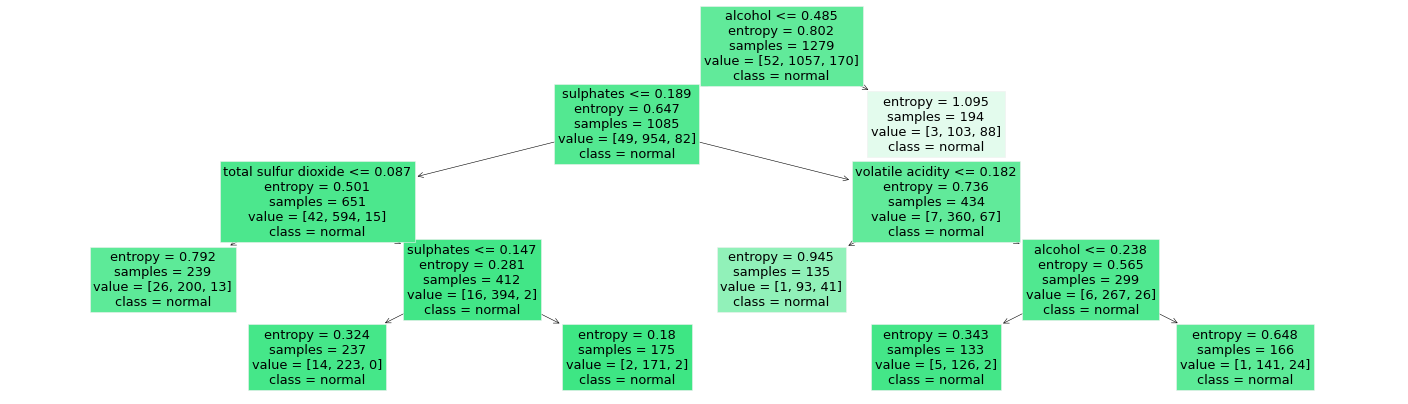

In [36]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.style.use('fivethirtyeight')
figure(num=None,figsize=(20,6),dpi=80,facecolor='w',edgecolor='k')
plot_tree(dtreeclf,feature_names=list(col_names),class_names=[*label_map],filled=True)